### Regressão não-linear:
A <u>regressão não-linear</u> pelo método dos mínimos quadrados é um processo iterativo que envolve, entre outras coisas, aproximar o modelo não-linear para um modelo linear para o cálculo do gradiente (necessário para encontrar um conjunto de bons parâmetros). Por conta das aproximações e do processo iterativo, a solução deste problema também *depende do palpite inicial para os parâmetros do modelo*. Em outras palavras, se você tem um modelo não-linear com 3 parâmetros {$a$, $b$ e $c$}, então os valores de convergência para esses parâmetros vão depender do valor inicial dos mesmos que você escolheu antes de iniciar o processo iterativo.

Para calcular a regressão linear dos nossos dados obtidos no dls, vamos utilizar o modelo:
XXXXXXX

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from lmfit import Model
import pandas as pd

In [2]:
cor07 = pd.read_csv('dados\ID07 - correlograma.txt')
cor05 = pd.read_csv('dados\ID05 - Correlograma.txt')

In [3]:
# dados amostra 07
df2 = pd.read_csv('dados\ID07 - correlograma.txt', sep="\t")

In [4]:
# amostra 05
x1 = list(df2["Time (µs) - ID07 [Steady state]"])
y1 = list(df2["Correlation Coefficient (g₂-1) - ID07 [Steady state]"])
temp07 = x1[0:250]
co07 = y1[0:250]

Text(0, 0.5, 'coeficiente de correlação')

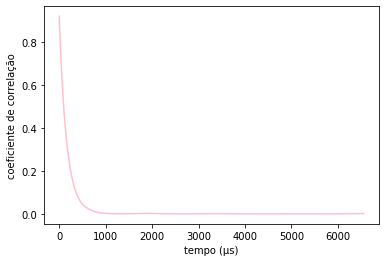

In [5]:
# gráfico amostra 05
plt.plot(temp07, co07, label = "gráfico de correlação 07", color = "pink")
plt.xlabel('tempo (µs)')
plt.ylabel('coeficiente de correlação')

In [6]:
# para dados da amostra 05
df = pd.read_csv('dados\ID05 - Correlograma.txt', sep="\t")

In [7]:
# amostra 05
x = list(df["Time (µs) - ID05 [Steady state]"])
y = list(df["Correlation Coefficient (g₂-1) - ID05 [Steady state]"])
tempo5 = x[0:250]
co05 = y[0:250]

Text(0, 0.5, 'coeficiente de correlação')

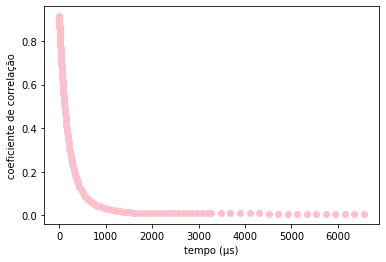

In [8]:
# gráfico amostra 05
plt.plot(tempo5, co05, "o", label = "gráfico de correlação", color = "pink")
plt.xlabel('tempo (µs)')
plt.ylabel('coeficiente de correlação')

In [11]:
def Dt(d, eta):
    x = 1.38e-23 * 300/3*np.pi*eta*d
    return x

eta = 8.9e-4 #PaS
n = 1.33 
lamb = 5.32e-7 #m
q = ((4*(np.pi)*n)/lamb)*(np.sin(np.pi/4)) 
dte = Dt(100e-9, eta) #dt estimado
A = -2*(q**2)*dte

def rxx(t, b, A):
    corr = b*np.exp(A*t)
    return corr